In [98]:
import sys
import tensorflow as tf
import pandas as pd
import sklearn as sk
import platform
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

In [99]:
# tf.config.list_physical_devices??

In [100]:
#what is this line of code

In [101]:
# return a list of physical devices visible to the host runtime
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [102]:
# declare a variable for the data directory
data_dir = '/Users/alexanderirabor/Downloads/MachineLearning/ImageClassifier/data'

In [103]:
os.listdir(data_dir)

['happy', '.DS_Store', 'sad']

In [104]:
# lets return an array of every single image inside the 'happy' folder
# os.listdir(os.path.join(data_dir, 'happy'))

In [105]:
# this outputs an image as a numpy array
# grab a specific image from the 'happy' folder
img = cv2.imread(os.path.join(data_dir,'happy','35438_hd.jpg'))

In [106]:
img.shape

(649, 1240, 3)

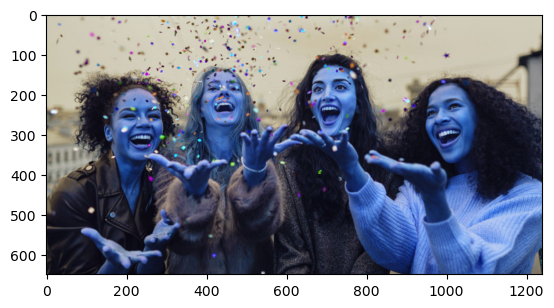

In [107]:
plt.imshow(img)

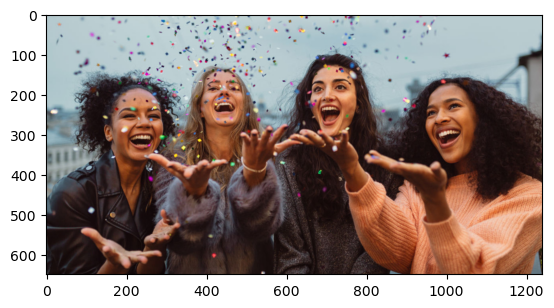

In [108]:
# converting the image to colored image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [109]:
# array of allowed extensions
image_exts = ['jpeg','png','bmp','jpg']

In [110]:
# remove unwanted files from the image folder
for image_class in os.listdir(data_dir):
    # we skip the .DS_Store file because it's not needed in this process
    if image_class == '.DS_Store':
        continue
    # we get all the images from all the folders by using the os.path.join() method
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # grab the image path of all the images
        image_path = os.path.join(data_dir, image_class, image)
        # print(image_path)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [111]:
# load the image data

In [36]:
tf.data.Dataset??

In [112]:
import numpy as np
from matplotlib import pyplot as pt

**BUILDING THE DATA PIPELINE**

In [113]:
# BUILDING OUR DATA PIPELINE
# import the image dataset using the keras library
# we will store our dataset into a variable called data
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 283 files belonging to 2 classes.


In [114]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [115]:
# ACCESSING OUR DATA PIPELINE
# convert the data into a numpy iterator so that we can grab the individual data
data_iterator = data.as_numpy_iterator()

In [116]:
data_iterator

In [117]:
# SELECTING INDIVIDUAL BATCHES OF THE DATA
batch = data_iterator.next()

In [118]:
# the batch numpy array contains two elements
# 1. the images(their array representation) (batch[0]), 
# 2. the label(batch[1]) 
# len(batch)

In [119]:
# view the images
batch[0]

array([[[[2.35000000e+02, 2.29000000e+02, 2.13000000e+02],
         [2.35000000e+02, 2.29000000e+02, 2.13000000e+02],
         [2.35000000e+02, 2.29000000e+02, 2.13000000e+02],
         ...,
         [2.32000000e+02, 2.25452881e+02, 2.13967651e+02],
         [2.32000000e+02, 2.26000000e+02, 2.14000000e+02],
         [2.31006470e+02, 2.25006470e+02, 2.11068970e+02]],

        [[2.35000000e+02, 2.29000000e+02, 2.13000000e+02],
         [2.35000000e+02, 2.29000000e+02, 2.13000000e+02],
         [2.35000000e+02, 2.29000000e+02, 2.13000000e+02],
         ...,
         [2.34000000e+02, 2.26375000e+02, 2.12705078e+02],
         [2.32375000e+02, 2.25187500e+02, 2.12187500e+02],
         [2.32271606e+02, 2.25103516e+02, 2.13644287e+02]],

        [[2.35000000e+02, 2.29000000e+02, 2.13000000e+02],
         [2.35000000e+02, 2.29000000e+02, 2.13000000e+02],
         [2.35000000e+02, 2.29000000e+02, 2.13000000e+02],
         ...,
         [2.33625000e+02, 2.29000000e+02, 2.17000000e+02],
         [

In [120]:
# view their labels
batch[1]

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int32)

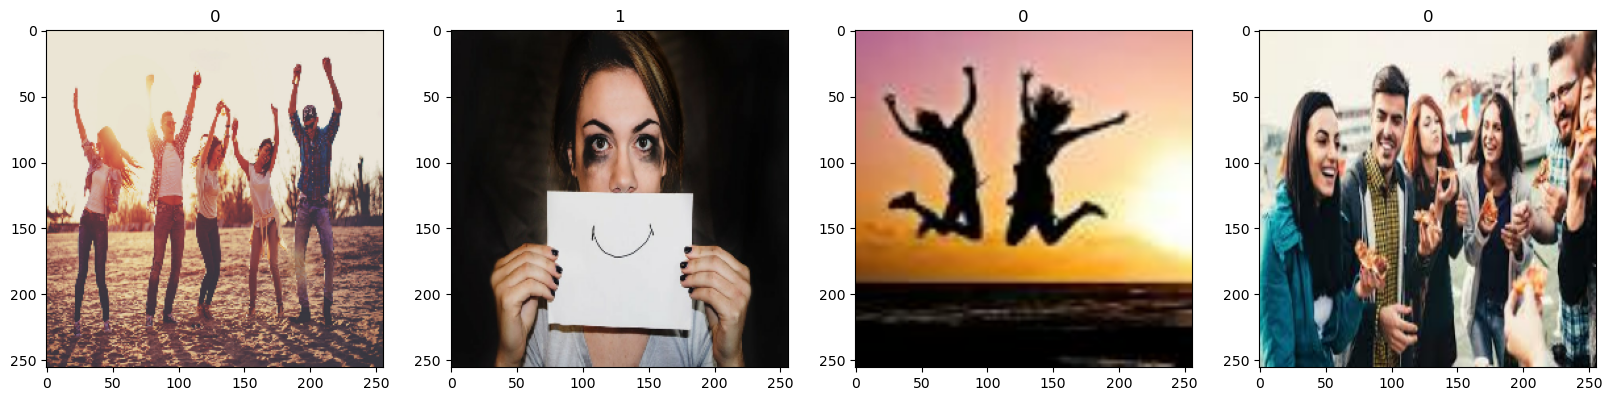

In [121]:
# Because it's difficult to know which images on the pipeline are labelled 0 or 1
# we will use the matplotlib's subplots() function to view all the images in the labels
# the image below means that it has labelled 0 as happy and 1 as sad in the pipeline
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**PRE-PROCESSING THE DATA**

In [122]:
# preprocessing involves scaling down the data to avoid overfitting
# we recreate the pipeline but this time we want to scale down the values
# of the image so as to prevent overfitting
# we will set the values of the image to be between 0 and 1
# but you will have some values in between like 0.4, 0.5, and 0.6 etc
# data = data.map(lambda x,y: (x/255,y))
data = data.map(lambda x,y: (x/255,y))

In [123]:
scaled_iterator = data.as_numpy_iterator()

In [124]:
# highest value in the pipeline 1 and the lowest is 0
# but you will have some values in between like 0.4, 0.5, and 0.6 etc
# data.as_numpy_iterator().next()[0].max()

In [125]:
batch = scaled_iterator.next()

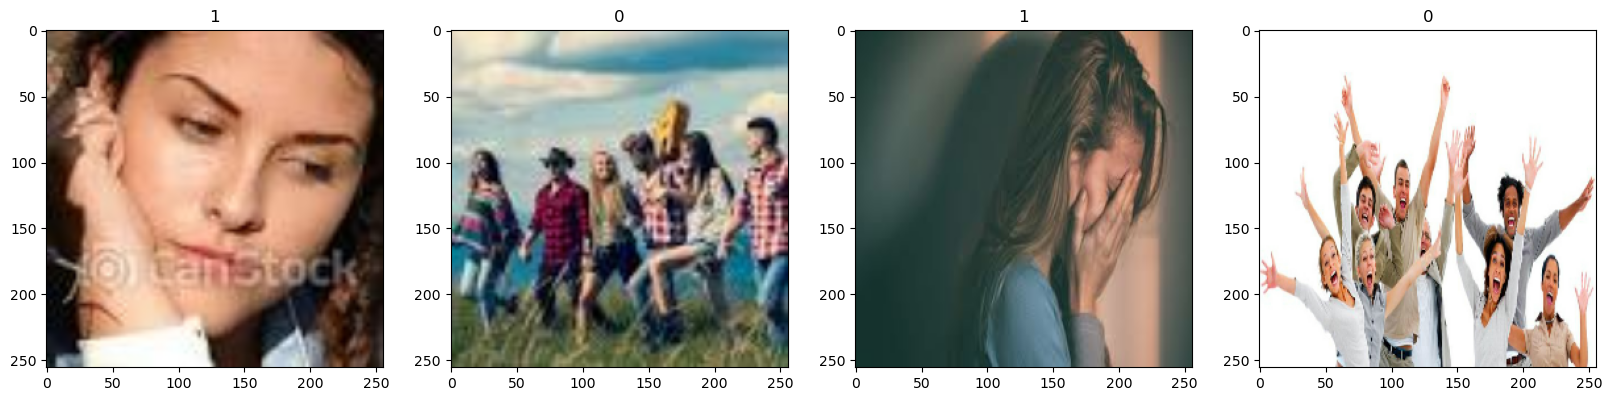

In [126]:
# using the subplot function to view the batch of images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data.Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data.

**SPLITTING THE IMAGE DATASET INTO TRAINING AND TESTING DATA**

In [127]:
# we split the data into 3 parts : training, validation and testing
# we have a total of 9 bacthes and we will divide them accordingly
# 6 batches will be used for training our model
# 2 batches will be used for the model validation
# 1 batch will be for testing
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [128]:
# we check the length of our batches and we can see that our data is divided into 9 batches
print("total number of batches:",len(data))
print("train size:", train_size)
print("validation size:",val_size)
print("test size:",test_size)

total number of batches: 9
train size: 6
validation size: 2
test size: 1


In [129]:
# establish our train, validation and test partition by using the take and skip module available inside the 
# tensor data pipeline 

In [130]:
# create a new dataset according to size of our training data
train = data.take(train_size)
# to setup the validation data we need to skip the training size and add the validation size
val = data.skip(train_size).take(val_size)
# to skip the validation data we skip both training and validation and include the test size
test = data.skip(train_size+val_size).take(test_size)
#test = data.skip(val_size).take(test_size)

In [131]:
print("training size:", len(train))
print("validation size:", len(val))
print("test size:", len(test))

training size: 6
validation size: 2
test size: 1


In [132]:
# data.take??

**BUILDING THE NEURAL NETWORK**

In [133]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [201]:
model = Sequential()

In [202]:
# create the various layers of our Convulated Neural Network
# Conv2D(no_of_filter,size_of_the_filters, stride, activation_functions, input_shape)
# First layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# second layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# third layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# flatten the data
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [203]:
# model.compile(optimizer, loss, tracking_metrics)
# optimizer = adam
# loss= tf.losses.BinaryCrossenthropy
# metrics = ['accuracy']
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [204]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

**TRAIN OUR DATA MODEL**

In [64]:
tf.config.optimizer.set_jit(True)

In [176]:
logdir='imageClassifierlogs'

In [205]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [206]:
#hist = model.fit(train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

In [207]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-02-20 12:59:57.090987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-20 12:59:59.988441: W tensorflow/compiler/jit/kernels/xla_ops.cc:466] Compilation failed:UNIMPLEMENTED: Could not find compiler for platform METAL: NOT_FOUND: could not find registered compiler for platform METAL -- check target linkage.  Falling back to TF function call.
2023-02-20 12:59:59.989247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 6.0085 - accuracy: 0.5000

2023-02-20 13:00:01.829675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 7s 443ms/step - loss: 6.0085 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5469
Epoch 2/20
6/6 [==============================] - 4s 410ms/step - loss: 0.6932 - accuracy: 0.4688 - val_loss: 0.6933 - val_accuracy: 0.4688
Epoch 3/20
6/6 [==============================] - 4s 407ms/step - loss: 0.6896 - accuracy: 0.5833 - val_loss: 0.6961 - val_accuracy: 0.5469
Epoch 4/20
6/6 [==============================] - 4s 410ms/step - loss: 0.7030 - accuracy: 0.5208 - val_loss: 0.7075 - val_accuracy: 0.5156
Epoch 5/20
6/6 [==============================] - 4s 429ms/step - loss: 0.7491 - accuracy: 0.4688 - val_loss: 0.7065 - val_accuracy: 0.5781
Epoch 6/20
6/6 [==============================] - 4s 399ms/step - loss: 0.6953 - accuracy: 0.5365 - val_loss: 0.6942 - val_accuracy: 0.5156
Epoch 7/20
6/6 [==============================] - 4s 561ms/step - loss: 0.7165 - accuracy: 0.5312 - val_loss: 0.6875 - val_accuracy: 0.5469
Epoch 8/20
6/6 [===============

**PLOT PERFORMANCE**

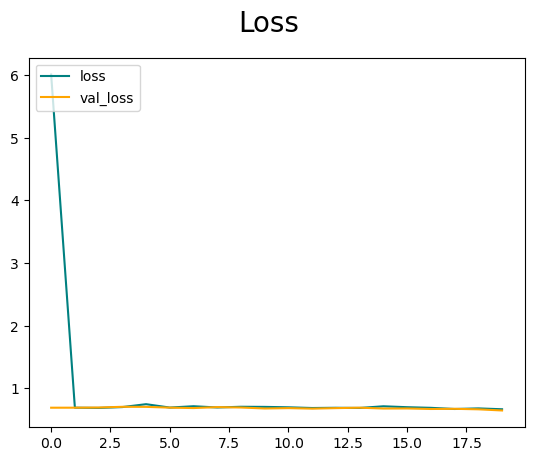

In [208]:
# we first try to plot the loss data

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [144]:
# the fall in loss and val_loss values indicates that there is no risk of overfitting and our neural netwrok is
# able to learn from the data provided. Where there is an increase you need to probably change to a more advanced
# neural network or change some of the input data

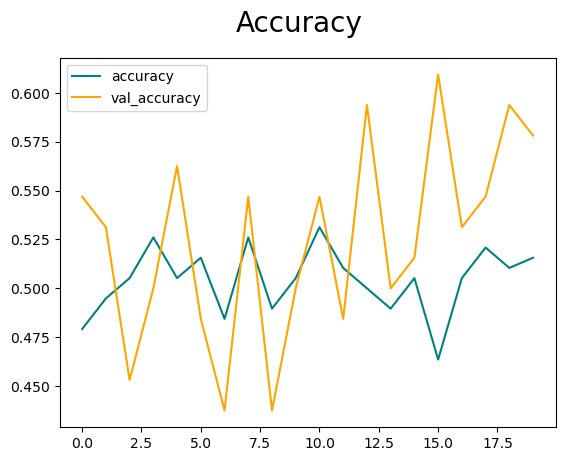

In [181]:
# next, we need to plot for the accuracy 
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [146]:
# our graph shows an increase in accuracy which means there is no overfitting and our 
# classifier is learning from the data provided 

**EVALUATE**

In [147]:
# when evaluating our model we usually check for three parameters: precision, recall and accuracy
# a high precision, recall and accuracy is usually a good sign that our model is working as it should

In [182]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [183]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [184]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-02-20 12:57:18.469859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 357ms/step


In [185]:
# let's view our Precision, Recall and Accuracy
# the value below is a bit hard to read so we have to format it to a readable format
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.3703704, shape=(), dtype=float32)


In [186]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.0, Recall:0.0, Accuracy:0.37037038803100586


In [187]:
# a high precision, recall and accuracy indicates our model is working well. 

**TEST**

In [188]:
# Its time to test our model, so we will use happy and sad images from the web. We will use images that are not 
# available in any of our classes. So I will download a happy image and a sad image from the web and 
# store it in a separate folder from any of our classes

In [189]:
import cv2

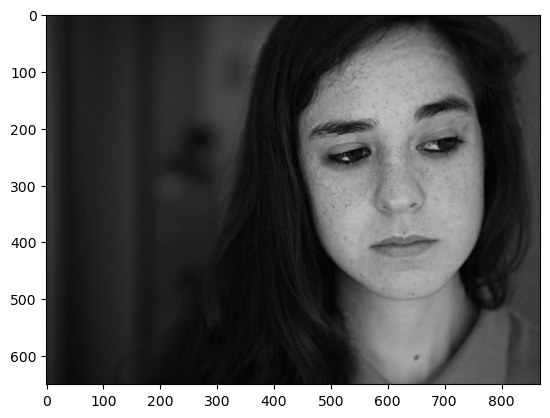

In [195]:
# load our random image
img = cv2.imread('/Users/alexanderirabor/Downloads/MachineLearning/ImageClassifier/test/s_emotion1pexels.jpg')
plt.imshow(img)
plt.show()

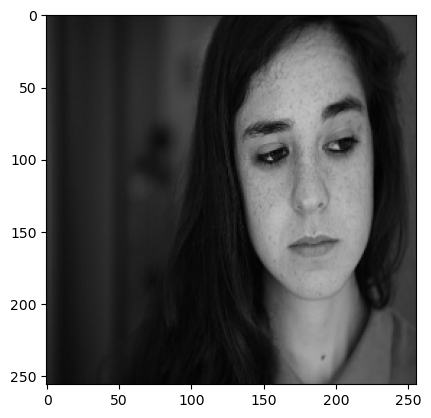

In [196]:
# wee need to resize the image according to our model specifications
# which 256 by 256 by 3 channels
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [197]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 86ms/step


In [199]:
yhat

array([[0.46711886]], dtype=float32)

In [200]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [161]:
from tensorflow.keras.models import load_model

In [165]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
array([[0.01972741]], dtype=float32)